##Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

#1. Exploring dataset

##Importing the dataset

In [ ]:
df = pd.read_csv('adult.csv')
df.sample
df.head(10)

ParserError: Error tokenizing data. C error: Expected 15 fields in line 9616, saw 18


##Distinguish categorical and numerical variables

In [ ]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [ ]:
num_df = df.select_dtypes(include=[np.number])
cat_df = df.select_dtypes(include=[object])

##Summary statistics of Adult Dataset

In [ ]:
df.describe()

In [ ]:
df.describe(include = "object")

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


##Explore the values and/or outliers

###Check Missing data

In [ ]:
missing_values = df.applymap(lambda x : x == "?")
missing_values.sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

<Axes: >

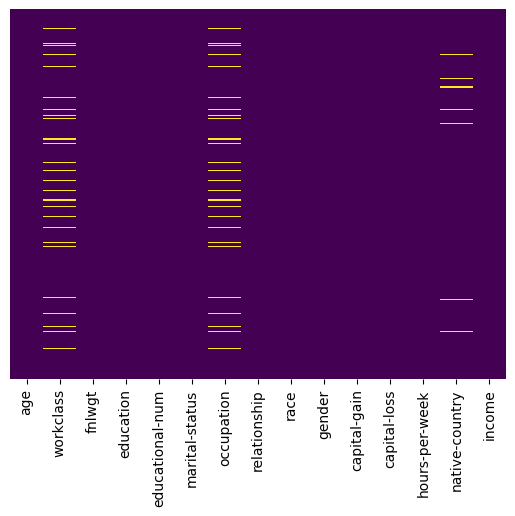

In [ ]:
sns.heatmap(missing_values, yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
missing_columns = [col_name for col_name in missing_values.columns if missing_values.loc[:,col_name].sum() > 0]
missing_columns

['workclass', 'occupation', 'native-country']

###Check outliers in numerical column

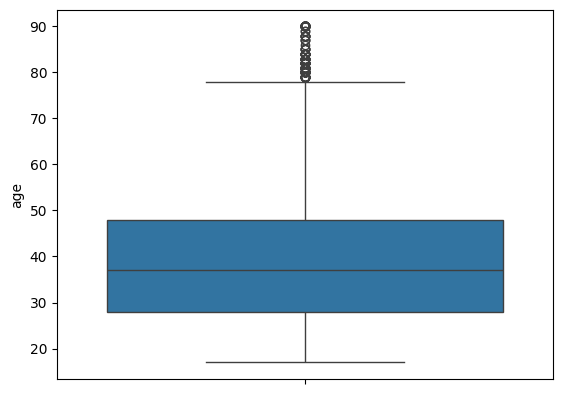

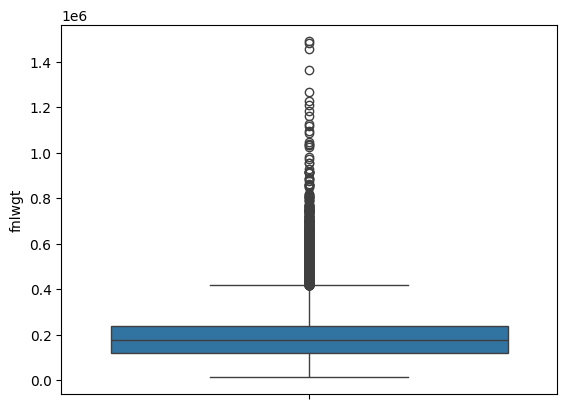

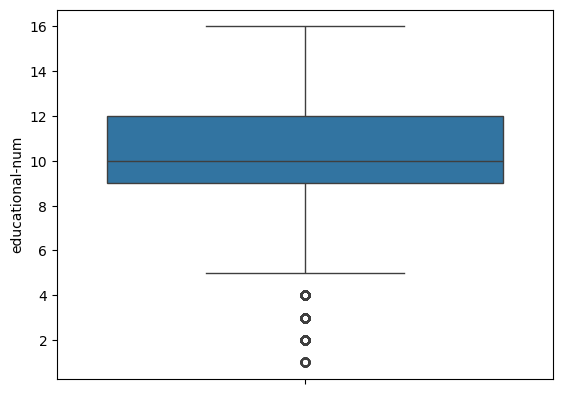

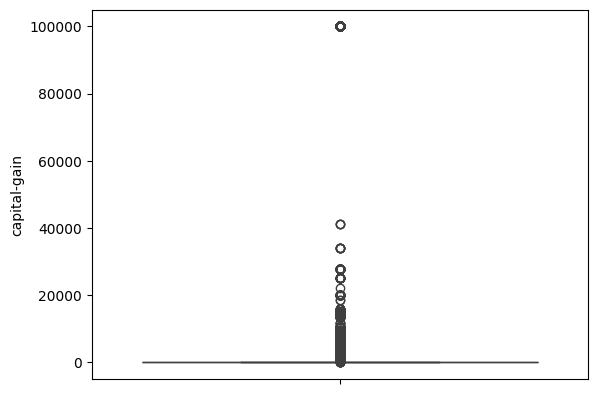

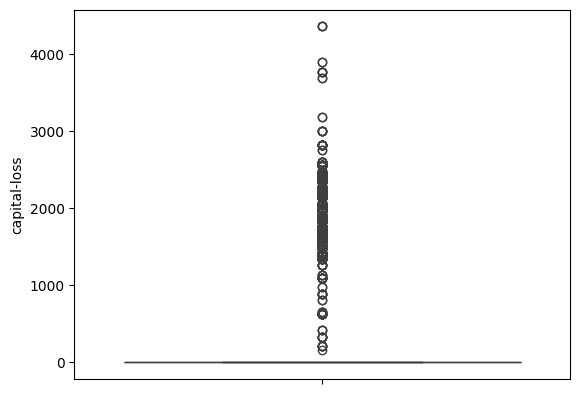

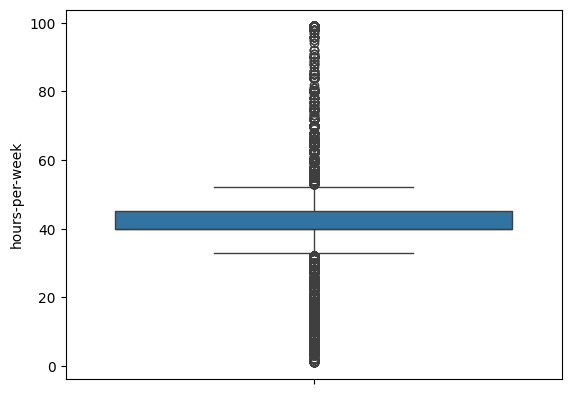

In [ ]:
for colName in num_df:
    sns.boxplot(data=num_df[colName])
    plt.show()

In [ ]:
for col in num_df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if df[col].min() < lower_bound or df[col].max() > upper_bound:
        print(f'{col} has outliers')
    else:
        print(f'{col} has no outliers')

age has outliers
fnlwgt has outliers
educational-num has outliers
capital-gain has outliers
capital-loss has outliers
hours-per-week has outliers


##Which variables are categorical, and which are numerical?

In [ ]:
print("Name of numerical variables:")
for colName in num_df.columns:
    print(colName)
print("\n")
print("Name of categorical variables:")
for colName in cat_df.columns:
    print(colName)

Name of numerical variables:
age
fnlwgt
educational-num
capital-gain
capital-loss
hours-per-week


Name of categorical variables:
workclass
education
marital-status
occupation
relationship
race
gender
native-country
income


##Explore the categorical variables

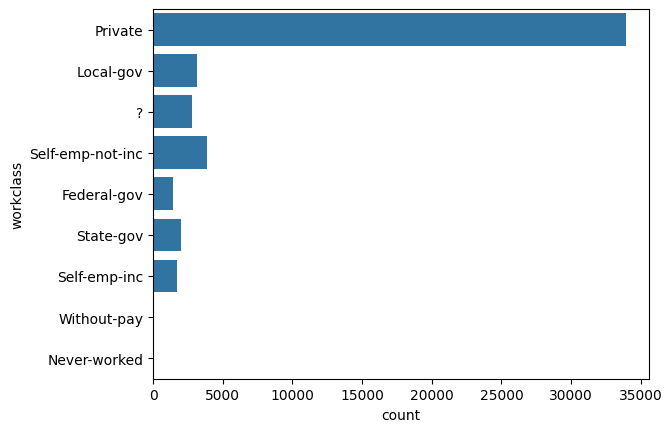

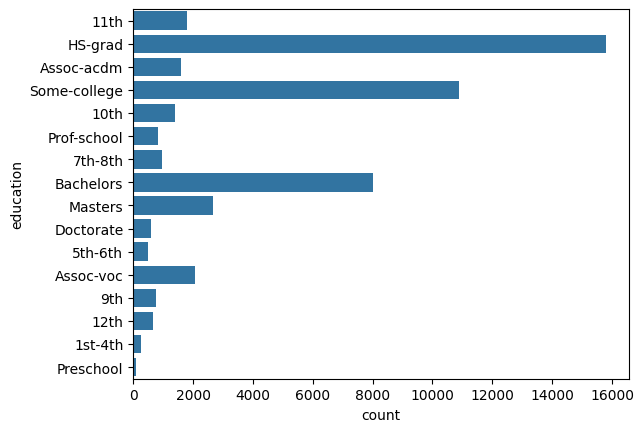

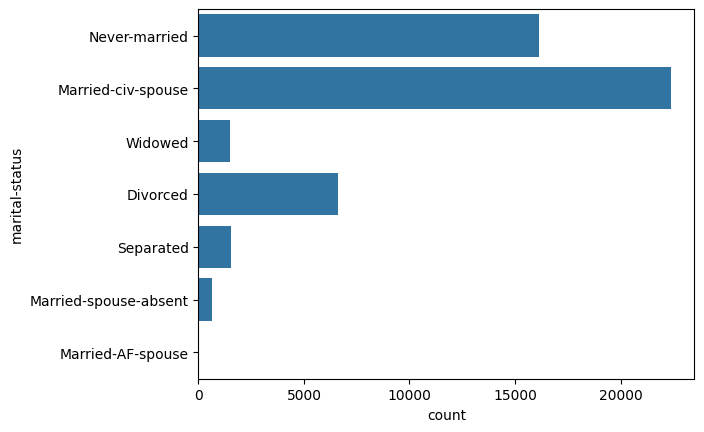

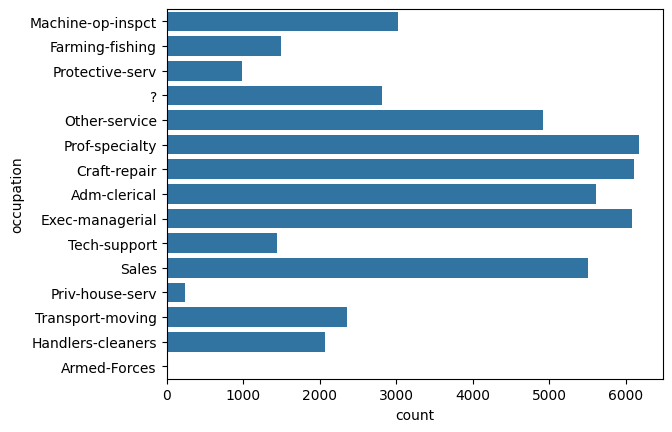

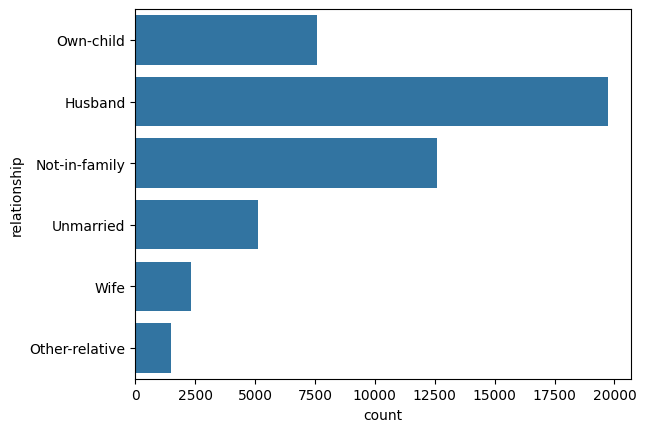

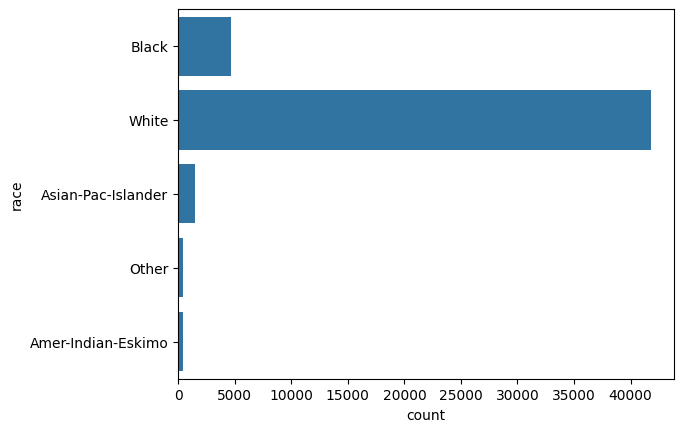

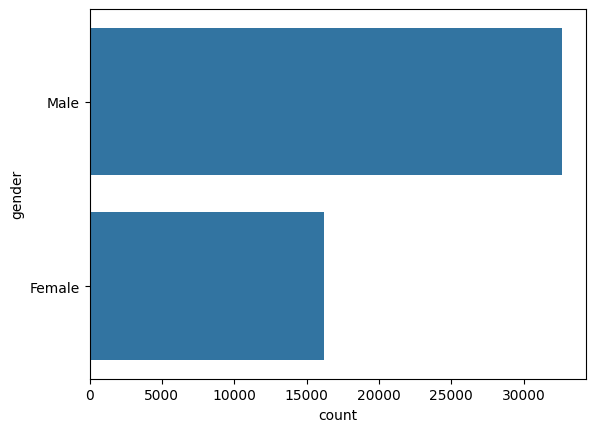

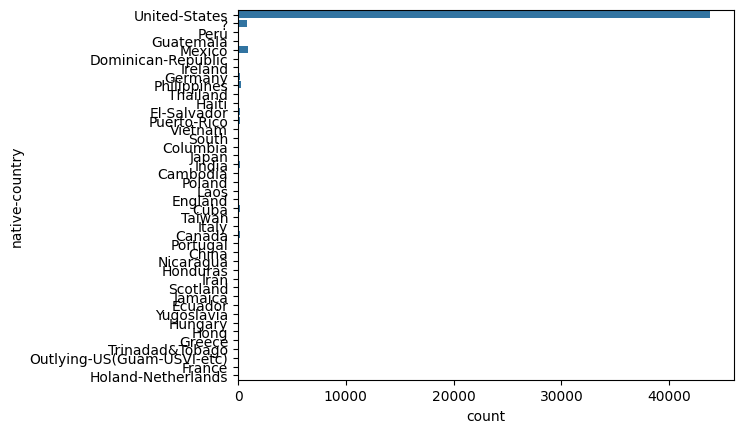

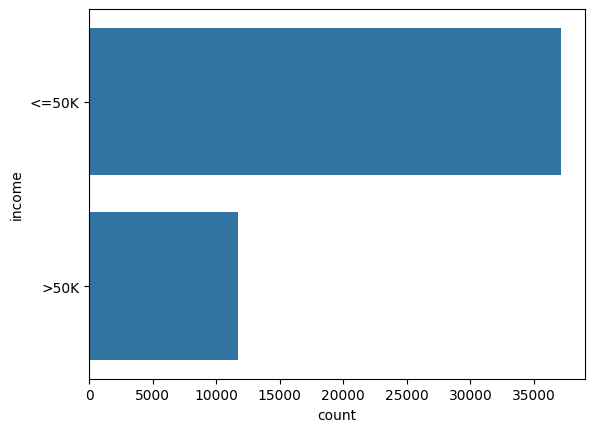

In [ ]:
for col in cat_df:
    sns.countplot(data=cat_df, y=col)
    plt.show()

##Explore the numerical variables

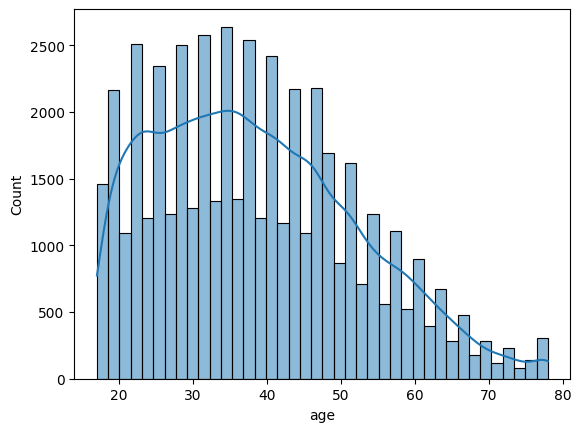

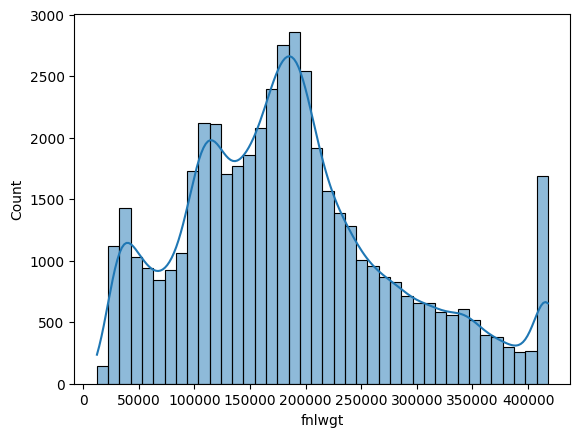

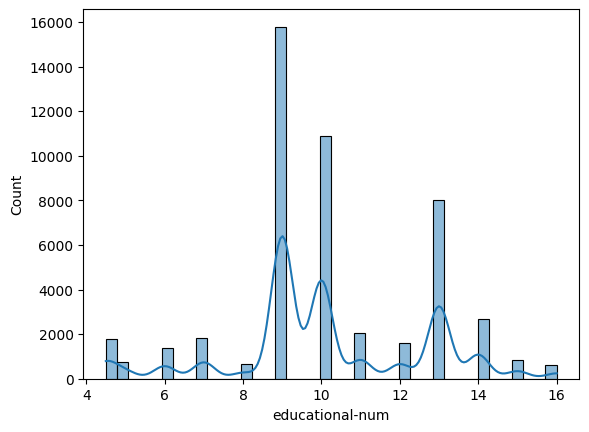

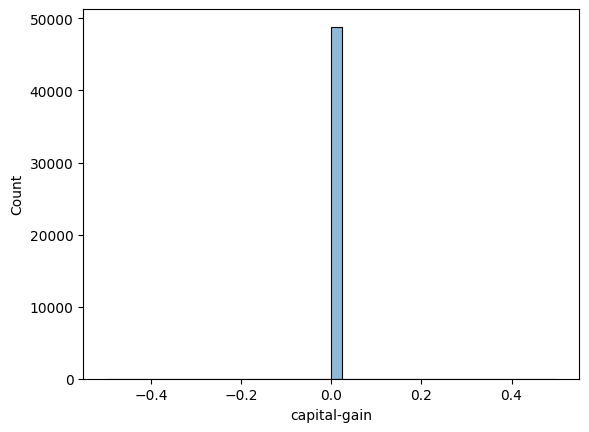

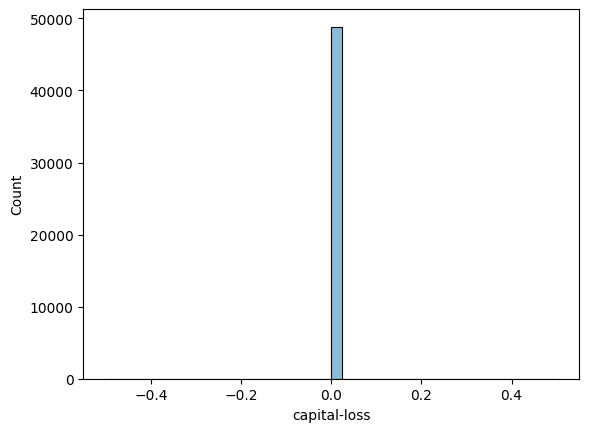

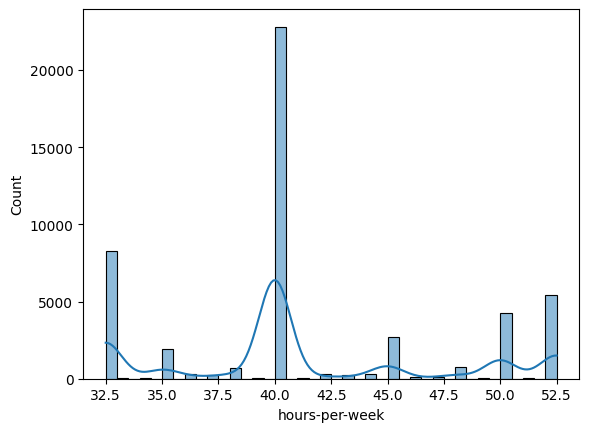

In [ ]:
for col in num_df:
    sns.histplot(num_df[col], bins = 40, kde = True)
    plt.show()

#2) Processing missing values and/or outliers

##Missing value treatment

In [ ]:
missing_columns

['workclass', 'occupation', 'native-country']

Use Most Frequent (Mode) Imputation, since all missing columns is categorical variables.

In [ ]:
for col in missing_columns:
    mode_value = df[col].mode()[0]
    df.loc[df[col] == '?', col] = mode_value

After missing value treatment

In [ ]:
missing_values = df.applymap(lambda x : x == "?")
missing_values.sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<Axes: >

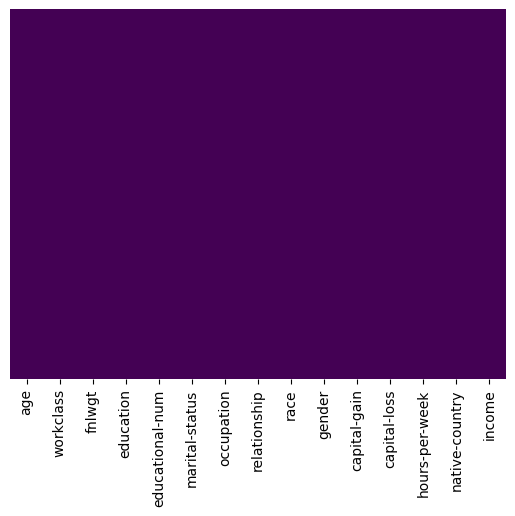

In [ ]:
sns.heatmap(missing_values, yticklabels=False, cbar=False, cmap='viridis')

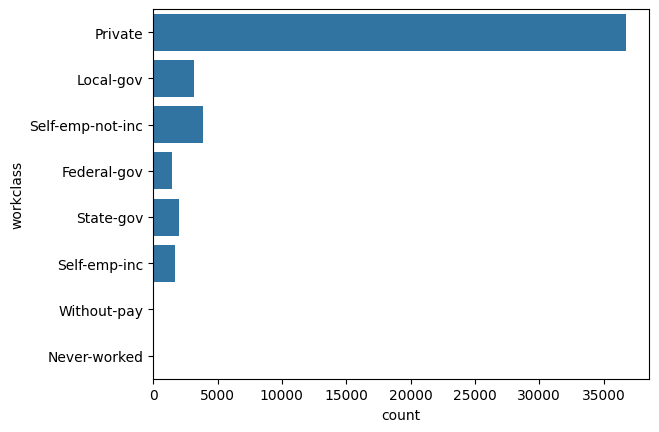

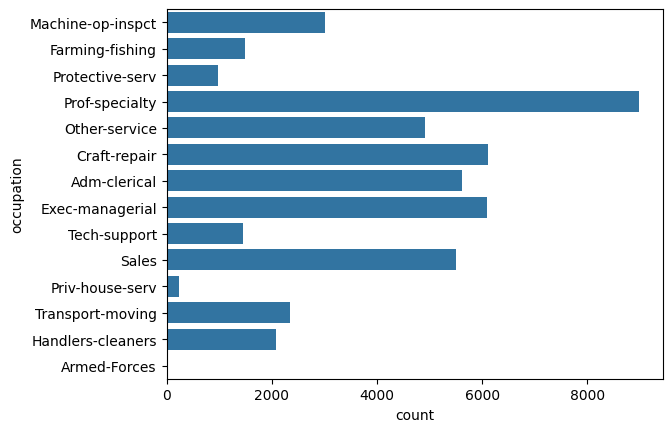

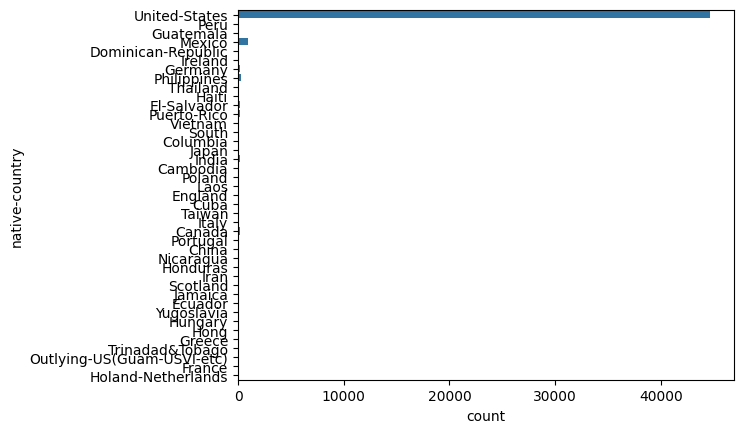

In [ ]:
for col_name in missing_columns:
    sns.countplot(data=df, y=col_name)
    plt.show()

##Outlier treatment

From EDA, all of numerical variables has outliers

In [ ]:
num_df.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Use Capping (Winsorizing) to replace outliers with a maximum or minimum value within a certain range

In [ ]:
for col in num_df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound,upper_bound,np.where(df[col] < lower_bound,lower_bound,df[col]))
    num_df[col] = np.where(num_df[col] > upper_bound,upper_bound,np.where(num_df[col] < lower_bound,lower_bound,num_df[col]))

After outlier treatment

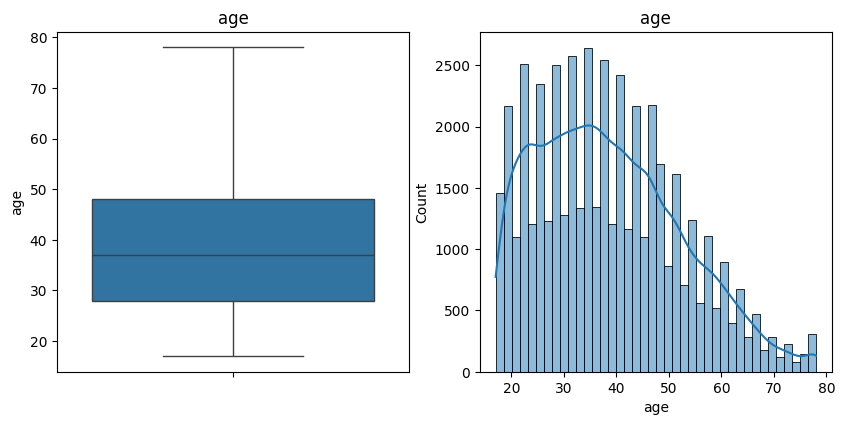

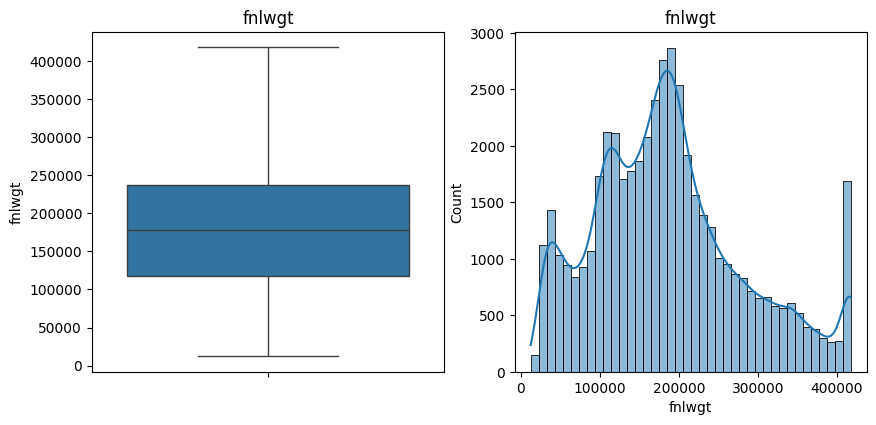

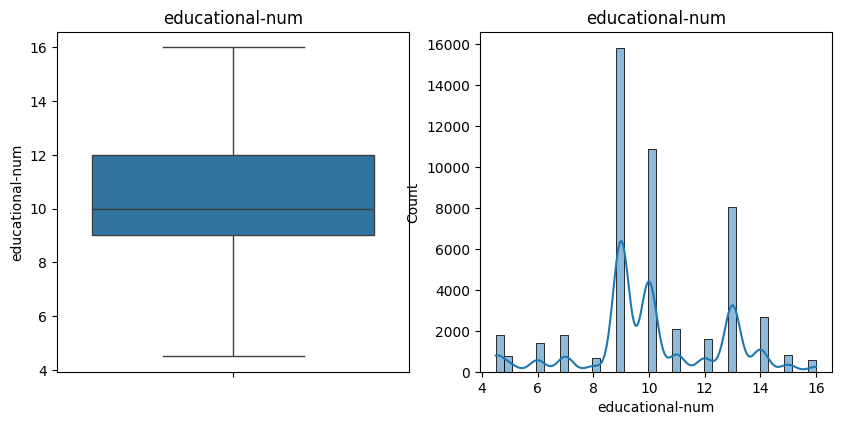

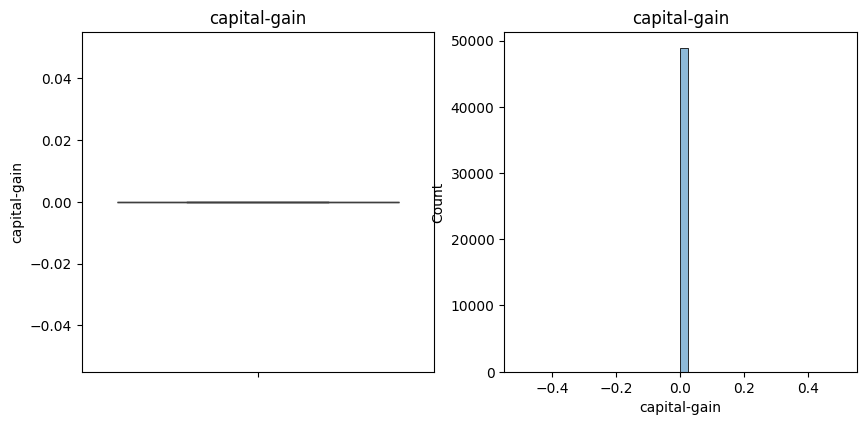

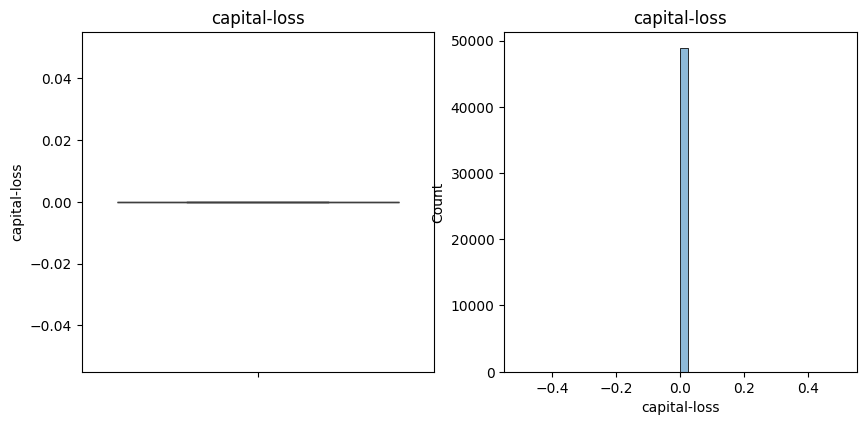

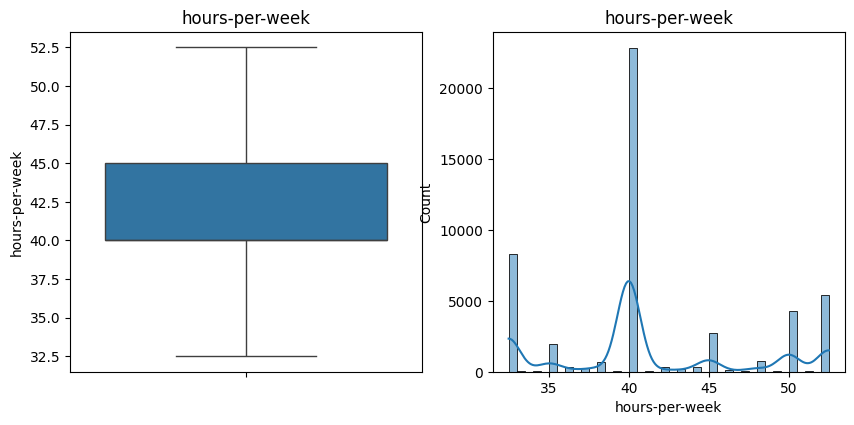

In [ ]:
for col in num_df:
    plt.figure(figsize=(10, 15))
    plt.subplot(3, 2, 1)
    plt.title(col)
    sns.boxplot(data=df[col])
    plt.subplot(3, 2, 2)
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(col)
    plt.show()

In [ ]:
for col in num_df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if df[col].min() < lower_bound or df[col].max() > upper_bound:
        print(f'{col} has outliers')
    else:
        print(f'{col} has no outliers')

age has no outliers
fnlwgt has no outliers
educational-num has no outliers
capital-gain has no outliers
capital-loss has no outliers
hours-per-week has no outliers


#3) Processing categorical and/or numerical data

##Encoding the Independent Variables

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25.0,226802.0,7.0,0.0,0.0,40.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,38.0,89814.0,9.0,0.0,0.0,50.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,28.0,336951.0,12.0,0.0,0.0,40.0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44.0,160323.0,10.0,0.0,0.0,40.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,18.0,103497.0,10.0,0.0,0.0,32.5,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


## Set roles X and y for supervised-learning

In [ ]:
y_df = df[['income_>50K']]
df.drop(['income_>50K'],axis=1,inplace=True)
X_df = df

In [ ]:
X = X_df.values
y = y_df.values

In [ ]:
print(X)

[[25.0 226802.0 7.0 ... True False False]
 [38.0 89814.0 9.0 ... True False False]
 [28.0 336951.0 12.0 ... True False False]
 ...
 [58.0 151910.0 9.0 ... True False False]
 [22.0 201490.0 9.0 ... True False False]
 [52.0 287927.0 9.0 ... True False False]]


## Encoding the Dependent Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(y)

[0 0 1 ... 0 0 1]


##Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[78.0 111189.0 4.5 ... False False False]
 [49.0 122066.0 10.0 ... True False False]
 [62.0 168682.0 4.5 ... True False False]
 ...
 [18.0 179597.0 9.0 ... True False False]
 [46.0 145290.0 11.0 ... True False False]
 [24.0 376393.0 11.0 ... True False False]]


In [ ]:
print(X_test)

[[31.0 224234.0 9.0 ... True False False]
 [25.0 149486.0 9.0 ... True False False]
 [36.0 343721.0 16.0 ... True False False]
 ...
 [55.0 254949.0 9.0 ... True False False]
 [40.0 135056.0 9.0 ... True False False]
 [45.0 205644.0 9.0 ... True False False]]


In [ ]:
print(y_train)

[0 0 0 ... 0 1 0]


In [ ]:
print(y_test)

[0 0 1 ... 0 0 0]


#4) Feature scaling & Split Train/Test data

##Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
print(X_train)

[[78.0 111189.0 4.5 ... -3.267114392020084 -0.03822223308374496
  -0.02373532925634932]
 [49.0 122066.0 10.0 ... 0.3060804979592234 -0.03822223308374496
  -0.02373532925634932]
 [62.0 168682.0 4.5 ... 0.3060804979592234 -0.03822223308374496
  -0.02373532925634932]
 ...
 [18.0 179597.0 9.0 ... 0.3060804979592234 -0.03822223308374496
  -0.02373532925634932]
 [46.0 145290.0 11.0 ... 0.3060804979592234 -0.03822223308374496
  -0.02373532925634932]
 [24.0 376393.0 11.0 ... 0.3060804979592234 -0.03822223308374496
  -0.02373532925634932]]


In [ ]:
print(X_test)

[[31.0 224234.0 9.0 ... 0.3060804979592234 -0.03822223308374496
  -0.02373532925634932]
 [25.0 149486.0 9.0 ... 0.3060804979592234 -0.03822223308374496
  -0.02373532925634932]
 [36.0 343721.0 16.0 ... 0.3060804979592234 -0.03822223308374496
  -0.02373532925634932]
 ...
 [55.0 254949.0 9.0 ... 0.3060804979592234 -0.03822223308374496
  -0.02373532925634932]
 [40.0 135056.0 9.0 ... 0.3060804979592234 -0.03822223308374496
  -0.02373532925634932]
 [45.0 205644.0 9.0 ... 0.3060804979592234 -0.03822223308374496
  -0.02373532925634932]]


##Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
# ประเมินประสิทธิภาพของ Model ที่ Test Data
print('Test set accuracy:', model.score(X_test, y_test))

Test set accuracy: 0.7561674685228785
